In [60]:
# longitude latitude  housing_median_age        total_rooms         total_bedrooms      population      households  median_income   median_house_value  ocean_proximity
# longitud  latitud   antiguedad_media_vivienda total_habitaciones  total_dormitorios   población       hogares     ingreso_medio   valor_casa_mediana  proximidad_oceánica

import pandas as pd
datos = pd.read_csv("housing.csv")

In [61]:
# Ver cabeceras
print(datos.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [62]:
# Analizar la informacion: cantidad,media,std,minimo,25%,50%,75%,maximo
print(datos.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

In [63]:
# Informacion de los datos
print(datos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


In [64]:
######################################## Acondicionar el Set de datos ########################################
# Borrando los datos vacios
datos_na = datos.dropna()
# INFO DE DATOS NUEVOS
print(datos_na.info())

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB
None


In [65]:
# value_counts() -> Devuelve un objeto que contiene recuentos de valores únicos. El objeto resultante estará en orden descendente para que el primer 
# elemento sea el elemento que aparece con más frecuencia. Excluye los valores NA de forma predeterminada
# Debemos convertir la caracteristica categorica a numerica de 'ocean_proximity'
datos_na["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

In [66]:
# Existen 5 categorias posibles de "ocean_proximity", por lo que puede hacerse una conversion numerica
# <1H OCEAN, INLAND, NEAR OCEAN, NEAR BAY, ISLAND = 1, 2, 3, 4, 5
# El problema de esta conversion es que los modelos cuando estan entrenando al ver 1 2 3 4 y 5
# pueden darle mayor peso a los que tienen 5 porque numericamente son mas grandes. Para solucionar esto se usan Dummies / One-Hot Enconding
dummies = pd.get_dummies(datos_na["ocean_proximity"],dtype=int)
print(dummies)

# Agregando los Dummies al los datos_na
datos_na = datos_na.join(dummies)

       <1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN
0              0       0       0         1           0
1              0       0       0         1           0
2              0       0       0         1           0
3              0       0       0         1           0
4              0       0       0         1           0
...          ...     ...     ...       ...         ...
20635          0       1       0         0           0
20636          0       1       0         0           0
20637          0       1       0         0           0
20638          0       1       0         0           0
20639          0       1       0         0           0

[20433 rows x 5 columns]


In [67]:
# Borrando la columna ocean_proximity que ya no la necesitamos (axis=1 se refiere a que quiero borrar una columna llamada 'ocean_proximity')
datos_na = datos_na.drop(["ocean_proximity"],axis=1)
# Datos sin 'ocean_proximity' y con DUMMIES
print(datos_na.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  <1H OCEAN  \
0       322.0       126.0         8.3252            452600.0          0   
1      2401.0      1138.0         8.3014            358500.0          0   
2       496.0       177.0         7.2574            352100.0          0   
3       558.0       219.0         5.6431            341300.0          0   
4       565.0       259.0         3.8462            342200.0          0   

   INLAND  ISLAND  NEAR BAY  NEAR OCEAN  
0       0       0         1           0  
1       0     

In [70]:
# Guardando el df_concatenado en un archivo nuevo
# datos_na.to_csv("Introduccion_IA_Python_Domestika\\Unidad_4_Algoritmos_de_machine_learning\\02_Ejercicio_Regresion_Lineal\\datos_procesados.csv",index = False)

In [72]:
####################################### Correlaciones #######################################
import seaborn as sb
import matplotlib.pyplot as plt
correlaciones = datos_na.corr()

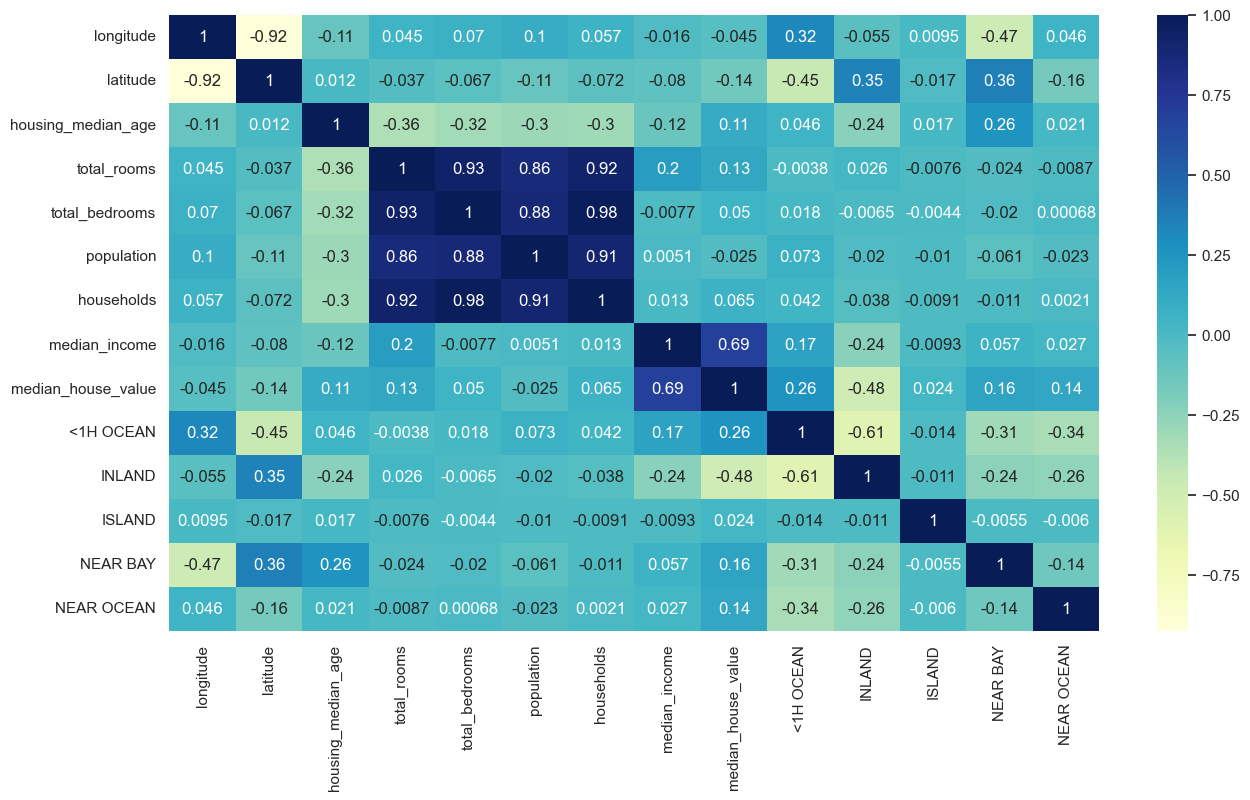

In [78]:
# Los 1 representan una relacion perfecta y -1 una relacion perfecta a la inversa(uno sube y el otro baja) y el 0 no hay relacion
# La diagonal es siempre 1 porque es el contraste de un dato consigo mismo
# • Fuerte relacion entre el valor_casa_mediana(median_house_value) y el ingreso_medio(median_income). A mayor valor de la casa, mayor sera el ingreso medio de la gente
sb.set(rc={"figure.figsize":(15,8)})
sb.heatmap(correlaciones,annot=True,cmap="YlGnBu")
plt.show()

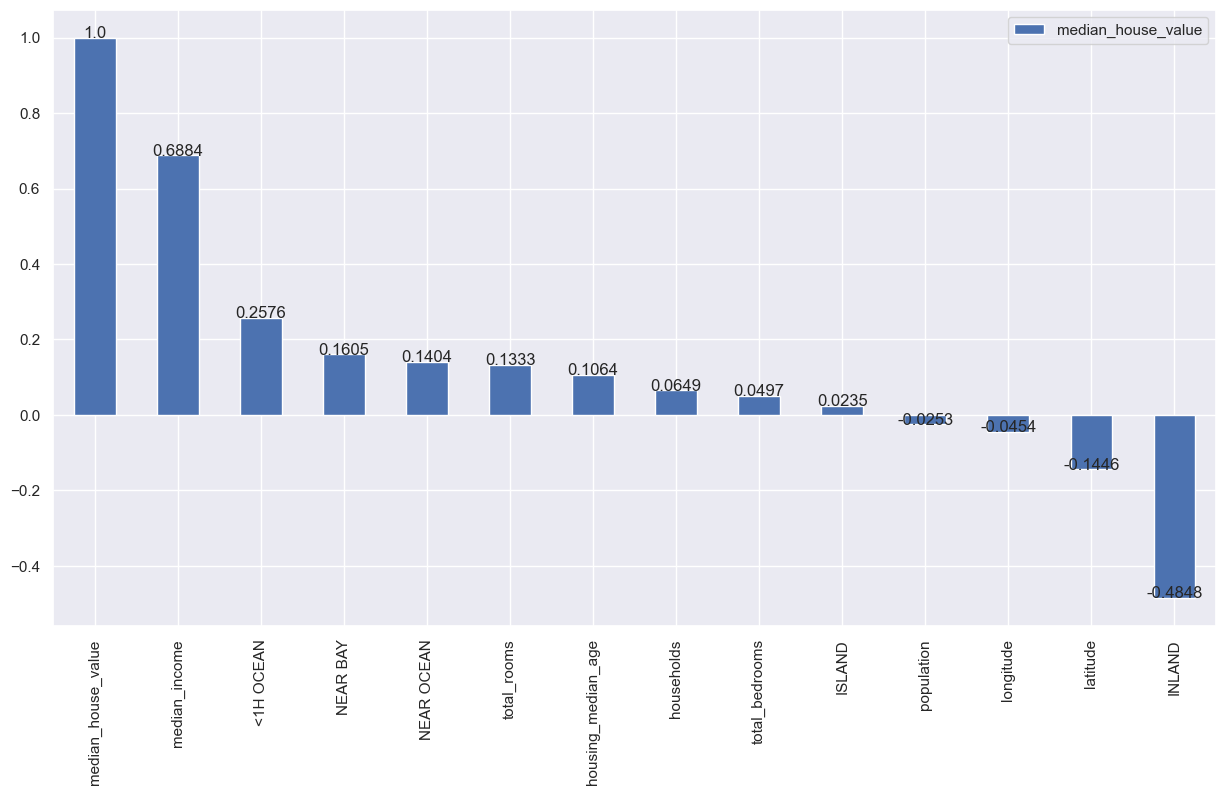

In [80]:
# Correlaciones unicamente del valor medio de una casa con el resto de caracteristicas
correlaciones_valorMedioCasa = datos_na.corr()["median_house_value"].sort_values(ascending=False)
df = pd.DataFrame(correlaciones_valorMedioCasa)
ax = df.plot(kind='bar')

for i, v in enumerate(correlaciones_valorMedioCasa):
    ax.text(i, v , str(round(v,4)), ha='center')
plt.show()